In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
file = r"C:\Users\Admin\Machine Learning Fundamentals\CSV_files\MLData.xlsx"
df = pd.read_excel(file)

#drop the column 'DA_Concentration' because it is null
df = df.drop(columns=['DA concentration'])
# Separate features (X) and target variable (y)
X = df.drop('DA Concentration (uM)', axis=1) 
y = df['DA Concentration (uM)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr_model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 21953.7402
R^2 Score: 0.6564


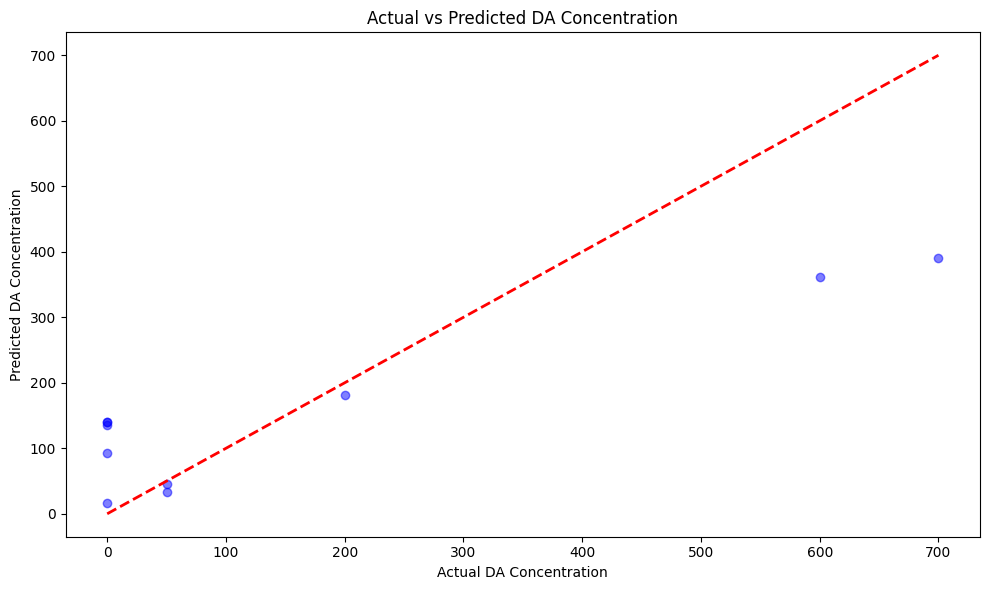

In [5]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual DA Concentration')
plt.ylabel('Predicted DA Concentration')
plt.title('Actual vs Predicted DA Concentration')
plt.tight_layout()
plt.show()

In [12]:
# Example of making a new prediction
# Replace these values with your input features
new_data = pd.DataFrame({
    'AA Concentration (uM)': [50],
    'Peak Current (uA)': [40.852],
    'Peak Potential (mV)': [167.246],
    'Peak Area (uC)': [126.391]
    # Add other feature columns here
})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Make prediction
prediction = svr_model.predict(new_data_scaled)
print(f"Predicted DA Concentration: {prediction[0]:.4f}")

Predicted DA Concentration: 168.9407


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5, 1.0]
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 'auto'}
